# Chapter 12 - K Nearest Neighbor

All about the k nearest neighbor technique for classification. It relies on no mathematical assumptions and not heavy lifting. It just requires a distance calculation and an assumption that points close to one another are similar.


In [50]:
#bringing in functions from other chapters

from collections import Counter
import matplotlib.pyplot as plt

# dot product
def dot(v, w):
    return sum(v_i * w_i
              for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    return dot(v,v)

# magnitudes
import math
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_dist(v,w):
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return magnitude(vector_subtract(v,w))

def vector_subtract(v, w): 
    return [v_i - w_i
           for v_i, w_i in zip(v,w)]

def mean(x):
    return sum(x) / len(x)




In [36]:

# we need a way to count the votes from a k set of classifiers

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

# nothing to do about ties though.
# reducing k until there's a winner

def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])
    
# easy to then make a classifier as it reduces labels until there's only one left and it wins

def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points, key=lambda point_label : distance(point_label[0], new_point))
    
    k_nearest_labels = [label for _, label in by_distance[:k]]
    return majority_vote(k_nearest_labels)

# state border plotter
import re
import matplotlib.pyplot as plt

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

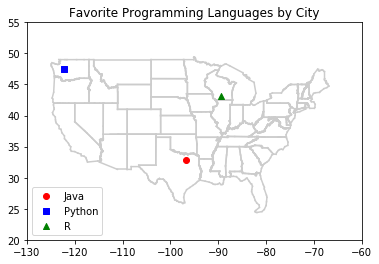

In [24]:
# example: favorite languages

cities = [([-122.3, 47.53], "Python"), ([ -96.85, 32.85], "Java"), ([ -89.33, 43.13], "R"),] # etc

plots = { "Java" : ([], []), "Python": ([],[]), "R" : ([], []) }

markers = { "Java" : "o", "Python" : 's', 'R' : "^" }
colors = { "Java" : 'r', "Python" : 'b', "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
    
for language, (x,y) in plots.items():
    plt.scatter(x,y, color=colors[language], marker=markers[language], label=language, zorder=10)

plot_state_borders() # pretending we have a function that does this. Actually we do from the github page...


plt.legend(loc=0)
plt.axis([-130, -60, 20, 55])
plt.title("Favorite Programming Languages by City")
plt.show()

In [39]:
# now we will predict using the neighbors

for k in [1, 3, 5, 7]:
    num_correct = 0
    for city in cities:
        location, actual_language = city
        other_cities = [other_city for other_city in cities if other_city != city]
        
    predicted_language = knn_classify(k, other_cities, location)
    if predicted_language == actual_language:
        num_correct += 1
        
    print(k, "neigbor[s]: ", num_correct, "correct out of", len(cities)) 

1 neigbor[s]:  0 correct out of 3
3 neigbor[s]:  0 correct out of 3
5 neigbor[s]:  0 correct out of 3
7 neigbor[s]:  0 correct out of 3


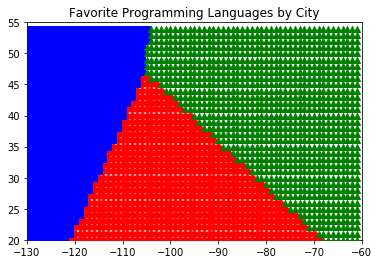

In [45]:
# we can plot an entire grid worth of points and then plotting them as we did with cities

plots = { "Java" : ([], []), "Python": ([],[]), "R" : ([], []) }

#k = 1 # or 3 or 5 etc
k= 3
#k = 5
for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)
        
for language, (x,y) in plots.items():
    plt.scatter(x,y, color=colors[language], marker=markers[language], label=language, zorder=10)

plot_state_borders() # pretending we have a function that does this. Actually we do from the github page...


plt.legend(loc=0)
plt.axis([-130, -60, 20, 55])
plt.title("Favorite Programming Languages by City")
plt.show()


## The Curse of Dimensionality

High dimensional spaces are VAST. Points in these spaces tend not be close to one another at all; one way to see this is by generating a d-dimensional unit cube and calculating the distances.

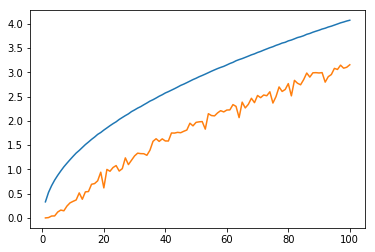

In [58]:
# generate some random data
import random

def random_point(dim):
    return [random.random() for _ in range(dim)]
def random_distance(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

# for every dimesion 1 to 100 we compute 10,000 distances and use those to compute the average distance between points
# and the minimum distance between points in each dimension

dimensions = range(1, 101)
avg_distance = []
min_distance = []

random.seed(0)
for dim in dimensions:
    distances = random_distance(dim, 10000)
    avg_distance.append(mean(distances))
    min_distance.append(min(distances))
    
plt.plot(dimensions, (avg_distance))
plt.plot(dimensions, (min_distance))
plt.show()

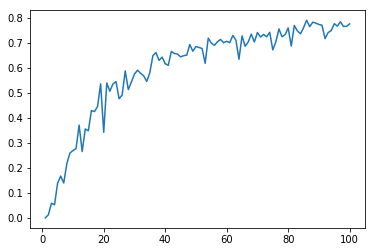

In [62]:
# as the number of dimensions increases the average distance, and more importantly the ratio between the average and minimum
# distance, increases. 

min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distance, avg_distance)]
plt.plot(dimensions, min_avg_ratio)

In low dimensional data sets the closest points are closer than average but two points are close only if they are close in every dimension. Every extra dimension, even if its just noise, is another opportunity for each point to be further away from every other point.

Worth reading the chapter here. As you increase dimensionality you get less coverage with the same data.

## This concludes chapter 12

Scikit-learn has many nearest neighbor models to explore.